In [1]:
%pylab inline
import scipy.optimize as opt
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys
# for fitting:
# from https://ipython-books.github.io/93-fitting-a-function-to-data-with-nonlinear-least-squares/

In [3]:
os.getcwd()

'/home/wave/allpix2/allpixfiles/trapping_analysis/20220622'

In [4]:
import glob
glob.glob("*txt")

['20220622_mpv_15e14.txt',
 '20220622_mpv_130e14.txt',
 '20220622_charge_fraction_3e14.txt',
 '20220622_charge_fraction_15e14.txt']

In [5]:
charge_fractions = {'15e14': {}}#, '1e13': {}}

for fluence in charge_fractions:
    charge_fractions[fluence] = {'bias': [], 'cce': [], 'stddev': []}
for fluence in charge_fractions.keys():
    print(fluence)
    filenames = glob.glob("*charge_fraction*" + fluence + "*txt")
    print(filenames)
    filename = filenames[0]
    with open(filename) as cce_vs_bias:
        for line in cce_vs_bias:
            if 'x_axis' in line or line.startswith('#') or line.strip() == '': continue
            bias, cce, std = line.split()
            print(line)
            if 'None' in cce: continue
            charge_fractions[fluence]['bias'].append(float(bias))
            charge_fractions[fluence]['cce'].append(float(cce))
            charge_fractions[fluence]['stddev'].append(float(std))   

15e14
['20220622_charge_fraction_15e14.txt']
50 0.14561887 0.023412314

100 0.22203455 0.024548444

150 0.28604223 0.027324692

200 0.36113428 0.038391267

250 0.49189962 0.04569087

300 0.5616919 0.061818695

350 0.59745286 0.063781009

400 0.61890368 0.056497301

450 0.63452089 0.054655998

500 0.64423238 0.065938526

550 0.65267054 0.061865866

600 0.65962864 0.06303409

650 0.66293098 0.071726519

700 0.67089879 0.058391954

750 0.67517187 0.060905199

800 0.67784037 0.063783846

850 0.67879095 0.069019272

900 0.68179828 0.067611095



In [6]:
def line(x, a, b):
    return a*x + b

In [7]:
depletion = 380
vbias_belowdep = []
vbias_abovedep = []
cce_belowdep = []
cce_abovedep = []
for bias in range(len(charge_fractions[fluence]['bias'])):
    vb = float(charge_fractions[fluence]['bias'][bias])
    cce = float(charge_fractions[fluence]['cce'][bias])
    if vb < depletion:
        cce_belowdep.append(cce)
        vbias_belowdep.append(vb)
    else:
        cce_abovedep.append(cce)
        vbias_abovedep.append(vb)
print(cce_abovedep)
vbias_belowdep = np.array(vbias_belowdep)
vbias_abovedep = np.array(vbias_abovedep)
cce_abovedep = np.array(cce_abovedep)
cce_belowdep = np.array(cce_belowdep)
print(cce_abovedep)

[0.61890368, 0.63452089, 0.64423238, 0.65267054, 0.65962864, 0.66293098, 0.67089879, 0.67517187, 0.67784037, 0.67879095, 0.68179828]
[0.61890368 0.63452089 0.64423238 0.65267054 0.65962864 0.66293098
 0.67089879 0.67517187 0.67784037 0.67879095 0.68179828]


In [8]:
# draw line over entire area
n = 1000
xrange = np.linspace(min(vbias_belowdep), max(vbias_abovedep), n)
# first line
(a1_, b1_), _ = opt.curve_fit(line, vbias_belowdep, cce_belowdep)
fitline1 = line(xrange, a1_, b1_)
# second line
(a2_, b2_,), _ = opt.curve_fit(line, vbias_abovedep, cce_abovedep)
fitline2 = line(xrange, a2_, b2_)
# intersection
idx = np.argwhere(np.diff(np.sign(fitline1 - fitline2))).flatten()
print(idx)


[355]


15
[50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0]
[0.14561887, 0.22203455, 0.28604223, 0.36113428, 0.49189962, 0.5616919, 0.59745286, 0.61890368, 0.63452089, 0.64423238, 0.65267054, 0.65962864, 0.66293098, 0.67089879, 0.67517187, 0.67784037, 0.67879095, 0.68179828]
[0.023412314, 0.024548444, 0.027324692, 0.038391267, 0.04569087, 0.061818695, 0.063781009, 0.056497301, 0.054655998, 0.065938526, 0.061865866, 0.06303409, 0.071726519, 0.058391954, 0.060905199, 0.063783846, 0.069019272, 0.067611095]
Cluster charge efficiency $\Phi_{\mathrm{eq}}=$15$\cdot 10^{14}$/cm$^2$


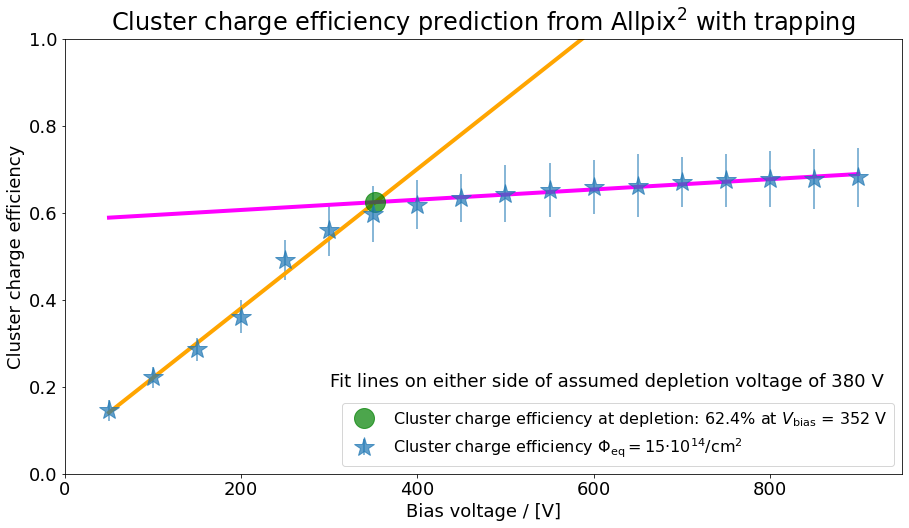

In [31]:
plt.figure(figsize=(15,8))
markerstyle = '*'
thickness = 200
voltage = -600
plot_file_name = ''
for fluence in ['15e14']:
    x = charge_fractions[fluence]['bias']
    y = charge_fractions[fluence]['cce']
    yerr = charge_fractions[fluence]['stddev']
    fluence_one, fluence_power = fluence.split('e')
    print(fluence_one)
    print(x)
    print(y)
    print(yerr)
    plt.ylim((0,1))
    plt.xlim((0,950))

    labelname = "Cluster charge efficiency $\Phi_{\mathrm{eq}}=$" + str(fluence_one) + "$\cdot 10^{" + str(fluence_power) +"}$/cm$^2$"
    print(labelname)
    #labelname = 'hi'
    plt.errorbar(x, y, yerr = yerr, label=labelname, fmt=markerstyle, markersize=20, alpha=0.7)

    #plt.errorbar(x, y, yerr = yerr, label='Cluster charge efficiency $\Phi_{\mathrm{eq}}=' + str(fluence_one) + '10^{' + str(fluence_power) +'$', fmt=markerstyle, markersize=20, alpha=0.7)
    plt.title("Cluster charge efficiency prediction from Allpix$^2$ with trapping", fontsize = 24)
    plt.xlabel("Bias voltage / [V]", fontsize = 18)
    plt.ylabel("Cluster charge efficiency", fontsize = 18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
plt.plot(xrange, fitline1, color='orange', linewidth=4)
plt.plot(xrange, fitline2, color='magenta', linewidth=4)
maxcce = "Cluster charge efficiency at depletion: " + str(round(100*fitline1[idx][0],1))
maxcce += '% at $V_\mathrm{dep}$ = ' + str(int(round(float(xrange[idx]), 0))) + ' V'
plt.annotate("Fit lines on either side of assumed depletion voltage of " + str(depletion) + " V", (300.8, 0.2), fontsize=18)
plt.plot(xrange[idx], fitline1[idx], 'o', markersize=20, alpha=0.7, color='green', label = maxcce)
plt.legend(fontsize = 16, loc='best')
dirname = os.path.dirname(filename)
plt.savefig(os.path.join(dirname + filename[:filename.index('_')] + '_' + fluence + '_cce_fitted.png'), bbox_inches="tight")
plt.show()


15
[50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0]
[0.14561887, 0.22203455, 0.28604223, 0.36113428, 0.49189962, 0.5616919, 0.59745286, 0.61890368, 0.63452089, 0.64423238, 0.65267054, 0.65962864, 0.66293098, 0.67089879, 0.67517187, 0.67784037, 0.67879095, 0.68179828]
[0.023412314, 0.024548444, 0.027324692, 0.038391267, 0.04569087, 0.061818695, 0.063781009, 0.056497301, 0.054655998, 0.065938526, 0.061865866, 0.06303409, 0.071726519, 0.058391954, 0.060905199, 0.063783846, 0.069019272, 0.067611095]
Cluster charge efficiency $\Phi_{\mathrm{eq}}=$15$\cdot 10^{14}$/cm$^2$


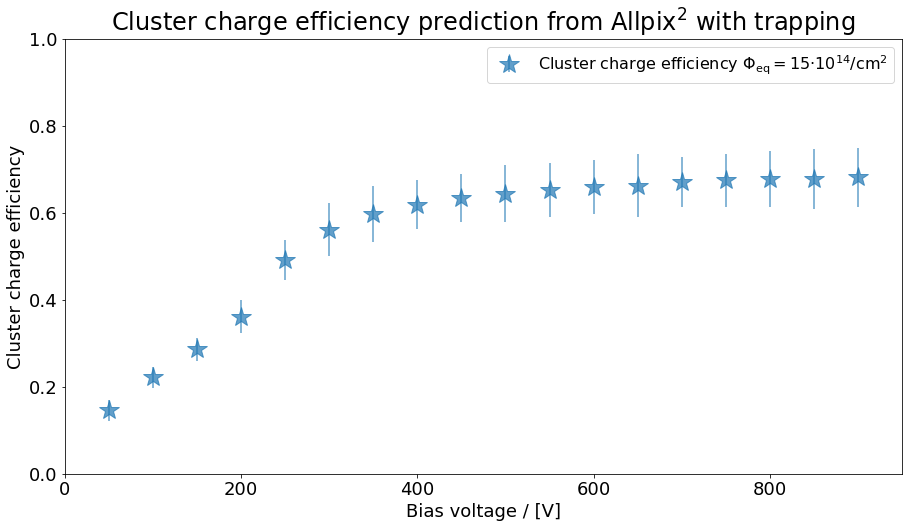

In [10]:
plt.figure(figsize=(15,8))
markerstyle = '*'
thickness = 200
voltage = -600
plot_file_name = ''
for fluence in charge_fractions:
    x = charge_fractions[fluence]['bias']
    y = charge_fractions[fluence]['cce']
    yerr = charge_fractions[fluence]['stddev']
    fluence_one, fluence_power = fluence.split('e')
    print(fluence_one)
    print(x)
    print(y)
    print(yerr)
    plt.ylim((0,1))
    plt.xlim((0,950))

    labelname = "Cluster charge efficiency $\Phi_{\mathrm{eq}}=$" + str(fluence_one) + "$\cdot 10^{" + str(fluence_power) +"}$/cm$^2$"
    print(labelname)
    #labelname = 'hi'
    plt.errorbar(x, y, yerr = yerr, label=labelname, fmt=markerstyle, markersize=20, alpha=0.7)

    #plt.errorbar(x, y, yerr = yerr, label='Cluster charge efficiency $\Phi_{\mathrm{eq}}=' + str(fluence_one) + '10^{' + str(fluence_power) +'$', fmt=markerstyle, markersize=20, alpha=0.7)
    plt.title("Cluster charge efficiency prediction from Allpix$^2$ with trapping", fontsize = 24)
    plt.xlabel("Bias voltage / [V]", fontsize = 18)
    plt.ylabel("Cluster charge efficiency", fontsize = 18)
    plt.legend(fontsize = 16, loc='best')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
dirname = os.path.dirname(filename)
plt.savefig(os.path.join(dirname + filename[:filename.index('_')] + '_cce.png'), bbox_inches="tight")
plt.show()


In [16]:
#cluster_charges = {'ljubljana': {}, 'dortmund': {}, 'cmstracker': {}}
#cluster_charges = {'1e13': {}, '1e15': {}}
cluster_charges = {'15e14': {}}

for fluence in cluster_charges:
    cluster_charges[fluence] = {'bias': [], 'mpv': [], 'err': []}
for fluence in cluster_charges.keys():
    print(fluence)
    filenames = glob.glob("*mpv*" + fluence + "*txt")
    print(filenames)
    filename = filenames[0]
    with open(filename) as mpv_vs_bias:
        for line in mpv_vs_bias:
            if 'mpv' in line or line.startswith('#') or line.strip() == '': continue
            bias, mpv, err = line.split()
            print(line)
            if 'None' in mpv: continue
            cluster_charges[fluence]['bias'].append(float(bias.split('e')[0]))
            cluster_charges[fluence]['mpv'].append(float(mpv))
            cluster_charges[fluence]['err'].append(float(err))   

15e14
['20220622_mpv_15e14.txt']
50 2.08471 0.0109579

100 3.19016 0.0154981

150 4.17006 0.0196654

200 5.32701 0.0257981

250 7.26155 0.0358577

300 8.31528 0.0386066

350 8.75556 0.0400958

400 9.14451 0.0446112

450 9.32389 0.0438439

500 9.48561 0.044294

550 9.57724 0.044405

600 9.64168 0.0466045

650 9.81825 0.0436073

700 9.90127 0.0511659

750 9.91348 0.0475577

800 9.99681 0.0479925

850 9.98198 0.0460558

900 10.0674 0.0455765



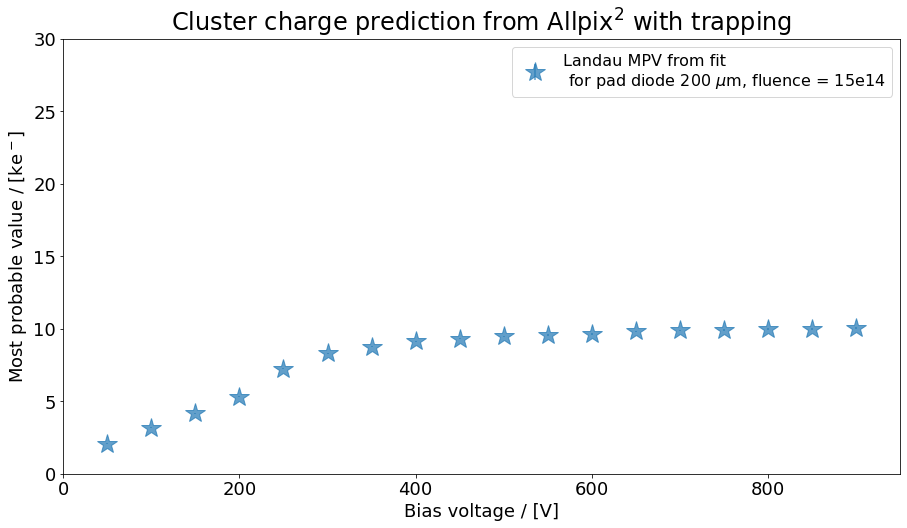

In [17]:
plt.figure(figsize=(15,8))
markerstyle = '*'
thickness = 200
model = 'cmstracker'
voltage = -600
plot_file_name = ''
for fluence in cluster_charges:
    x = cluster_charges[fluence]['bias']
    y = cluster_charges[fluence]['mpv']
    yerr = cluster_charges[fluence]['err']
    plt.errorbar(x, y, yerr = yerr, label="Landau MPV from fit\n for pad diode " + str(thickness) + " $\mu$m, fluence = " + fluence, fmt=markerstyle, markersize=20, alpha=0.7)
    plt.legend(fontsize = 16, loc='best')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    filenames = glob.glob("*" + model + "*dat")
    plt.title("Cluster charge prediction from Allpix$^2$ with trapping", fontsize = 24)
    plt.xlabel("Bias voltage / [V]", fontsize = 18)
    plt.ylabel("Most probable value / [ke$^-$]", fontsize = 18)
    plot_file_name += os.path.basename(filename)[:-4] + '_'
    plt.ylim((0,30))
    plt.xlim((0,950))
plt.savefig(os.path.join(dirname, plot_file_name + 'cluster_charge.png'), bbox_inches="tight")
plt.show()